In [2]:
#do necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

# Exercises

### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 

### * Create a pandas dataframe, df_iris, from this data.

In [ ]:
data('iris', show_doc=True)

In [ ]:
df_iris = data('iris')

### * print the first 3 rows

In [ ]:
print(df_iris.head(3))

### * print the number of rows and columns (shape)

In [ ]:
print(df_iris.shape)

### * print the column names

In [ ]:
print(df_iris.columns)

### * print the data type of each column

In [ ]:
print(df_iris.dtypes)

### * print the summary statistics for each of the numeric variables

In [ ]:
print(df_iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].describe())

In [ ]:
print(df_iris.describe())

## Read the data from this google sheet into a dataframe, df_google.

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

### * print the first 3 rows

In [ ]:
print(df_google.head(3))

### * print the number of rows and columns

In [ ]:
print(df_google.shape)

### * print the column names

In [ ]:
print(df_google.columns)

### * print the data type of each column

In [ ]:
print(df_google.dtypes)

### * print the summary statistics for each of the numeric variables

In [ ]:
print(df_google.describe())

### * print the unique values for each of your categorical variables

In [ ]:
print(f'df_google.Pclass --> {df_google.Pclass.unique()}')

In [ ]:
print(f'df_google.Sex --> {df_google.Sex.unique()}')

In [ ]:
print(f'df_google.Cabin --> {df_google.Cabin.unique()}')

In [ ]:
print(f'df_google.Embarked --> {df_google.Embarked.unique()}')

## Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [ ]:
df_excel = pd.read_excel('train.xlsx')

In [ ]:
df_excel.head(5)

### * assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

### * print the number of rows of your original dataframe

In [ ]:
df_excel.shape

### * print the first 5 column names

In [ ]:
print(df_excel.columns.values[0:5])

### * print the column names that have a data type of object

In [ ]:
print(df_excel.select_dtypes(include='object').columns.values)

### * compute the range for each of the numeric variables.

In [ ]:
df_excel.select_dtypes(include='number').max() - df_excel.select_dtypes(include='number').min()

# Exercises: Data Preparation

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

## Using the Iris Data:
### * Use the function defined in acquire.py to load the iris data.

In [ ]:
df_iris = acquire.get_iris_data()

In [ ]:
df_iris.info()

### * Drop the species_id and measurement_id columns.

In [ ]:
df_iris.drop(['species_id', 'measurement_id'], axis=1, inplace=True)

### * Rename the species_name column to just species.

In [ ]:
df_iris.rename({'species_name':'species'}, axis='columns', inplace=True)

### * Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [ ]:
dummy_df = pd.get_dummies(df_iris[['species']], dummy_na=False, drop_first=True)

In [ ]:
df_iris = pd.concat([df_iris, dummy_df], axis=1)

### * Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df_iris):
    """
    """
    df_iris.drop(['species_id', 'measurement_id'], axis=1, inplace=True)
    
    df_iris.rename({'species_name':'species'}, axis='columns', inplace=True)
    
    dummy_df = pd.get_dummies(df_iris[['species']], dummy_na=False, drop_first=True)
    
    df_iris = pd.concat([df_iris, dummy_df], axis=1)
    
    return df_iris

In [ ]:
df = acquire.get_iris_data()

In [ ]:
df = prep_iris(df)

In [ ]:
df.head()

## Using the Titanic dataset

### *Use the function defined in acquire.py to load the Titanic data.

### from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_titanic = acquire.get_titanic_data()

In [ ]:
df_titanic.info()

In [ ]:
df_titanic.describe()

In [ ]:
df_titanic.select_dtypes(include='number')

### *Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
df_titanic.head(5)
#class == pclass --> keep pclass because already numerical
#Unnamed: 0 == unncessary --> drop
#deck too many missing --> drop
#age: too many missing --> drop

In [ ]:
df_titanic.drop(['Unnamed: 0', 'embarked', 'class', 'age', 'deck'], axis=1, inplace=True)

In [ ]:
# use imputer to fill nan values in embark_town column

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer =  imputer.fit(df_titanic[['embark_town']])

df_titanic[['embark_town']] = imputer.transform(df_titanic[['embark_town']])

df_titanic.isnull().sum()

### *Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
df_titanic.head()

In [ ]:
dummy_titanic = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na=False, drop_first=['True', 'True'])

In [ ]:
df_titanic = pd.concat([df_titanic, dummy_titanic], axis=1)

### *Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(df_titanic):
    """
    """
    df_titanic.drop(['Unnamed: 0', 'embarked', 'class', 'age', 'deck'], axis=1, inplace=True)
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer =  imputer.fit(df_titanic[['embark_town']])
    df_titanic[['embark_town']] = imputer.transform(df_titanic[['embark_town']])

    dummy_titanic = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na=False, drop_first=['True', 'True'])
    df_titanic = pd.concat([df_titanic, dummy_titanic], axis=1)
    
    return df_titanic

In [ ]:
df_test = acquire.get_titanic_data()

In [ ]:
df_test = prep_titanic(df_test)

In [ ]:
df_test

## Using the Telco dataset

### Use the function defined in `acquire.py` to load the Telco data.

In [ ]:
df_telco = acquire.get_telco_data()

In [ ]:
df_telco.info()

### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
# with duplicates dropped, identify others that can be dropped. try using crosstabs
pd.crosstab(df_telco.internet_service_type_id, df_telco.internet_service_type) # --> can safely drop internet_service_type_id
pd.crosstab(df_telco.payment_type_id, df_telco.payment_type) # --> can safely drop payment_type_id
pd.crosstab(df_telco.contract_type_id, df_telco.contract_type) # --> can safely drop contract_type_id

In [ ]:
df_telco = df_telco.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])

In [ ]:
df_telco.head(5)

In [ ]:
# for loop to help run through columns and get handle on what values each contains
for col in df_telco.columns:
    if col not in ['tenure', 'customer_id', 'monthly_charges', 'total_charges']:
        print(df_telco[col].value_counts())
        print()

### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
# important to understand encoding guards against inadvertantly treating nominal categorical data as ordinal
# categorical columns with yes/no (either/or) values are binary. so they don't need dummy creation. just binary (1/0) encoding
# binary columns --> churn, gender, senior citizen, partner, dependants, phone_service, paperless_billing
    # can use mapping or column creation 

In [ ]:
gender_map = df_telco.gender.map({'Female':1, 'Male':0})

In [ ]:
gender_map # --> good test

In [ ]:
df_telco['gender_encoded'] = df_telco.gender.map({'Female':1, 'Male':0})
df_telco['partner_encoded'] = df_telco.partner.map({'Yes':1, 'No':0})
df_telco['dependents_encoded'] = df_telco.dependents.map({'Yes':1, 'No':0})
df_telco['phone_service_encoded'] = df_telco.phone_service.map({'Yes':1, 'No':0})
df_telco['paperless_billing_encoded'] = df_telco.paperless_billing.map({'Yes':1, 'No':0})
df_telco['churn_encoded'] = df_telco.churn.map({'Yes':1, 'No':0})

In [ ]:
# categorical columns --> contract_type, payment_type, internet_service_type, multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, paperless_billing

In [ ]:
dummy_telco = pd.get_dummies(df_telco[['contract_type', 'payment_type', 'internet_service_type', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], dummy_na=False, drop_first=True)

In [ ]:
dummy_telco.head()

In [ ]:
df_telco = pd.concat([df_telco, dummy_telco], axis=1)

In [ ]:
df_telco.total_charges = pd.to_numeric(df_telco.total_charges.str.strip())

### Create a function named `prep_telco` that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco(df_telco):
    """
    """
    df_telco = df_telco.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])
    
    df_telco['gender_encoded'] = df_telco.gender.map({'Female':1, 'Male':0})
    df_telco['partner_encoded'] = df_telco.partner.map({'Yes':1, 'No':0})
    df_telco['dependents_encoded'] = df_telco.dependents.map({'Yes':1, 'No':0})
    df_telco['phone_service_encoded'] = df_telco.phone_service.map({'Yes':1, 'No':0})
    df_telco['paperless_billing_encoded'] = df_telco.paperless_billing.map({'Yes':1, 'No':0})
    df_telco['churn_encoded'] = df_telco.churn.map({'Yes':1, 'No':0})
    
    dummy_telco = pd.get_dummies(df_telco[['contract_type',\
                                           'payment_type', \
                                           'internet_service_type', \
                                           'multiple_lines', \
                                           'online_security',\
                                           'online_backup',\
                                           'device_protection',\
                                           'tech_support',\
                                           'streaming_tv',\
                                           'streaming_movies']], dummy_na=False, drop_first=True)
    
    df_telco = pd.concat([df_telco, dummy_telco], axis=1)
    df_telco.total_charges = pd.to_numeric(df_telco.total_charges.str.strip())
    
    return df_telco

### Split your data

* Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [ ]:
def split_data(df, target):
    """
    """
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

* Run the function in your notebook on the Iris dataset, returning 3 datasets: `train_iris`, `validate_iris` and `test_iris`.

In [ ]:
df_iris = acquire.get_iris_data()

In [ ]:
df_iris = prepare.prep_iris(df_iris)

In [ ]:
df_iris.head()

In [ ]:
target = 'species'

In [ ]:
train_iris, validate_iris, test_iris = split_data(df_iris, target)

In [ ]:
#verify shapes of prepared df, train, validate, and test subsets
print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

* Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic. 
* print out shapes of each + the prepped df

In [ ]:
df_titanic = acquire.get_titanic_data()
df_titanic.head()

In [ ]:
df_titanic = prepare.prep_titanic(df_titanic)

In [ ]:
df_titanic.head()

In [ ]:
train_titanic, validate_titanic, test_titanic = split_data(df_titanic, 'survived')

In [ ]:
#verify shapes of prepared df, train, validate, and test subsets
print(f'Prepared df: {df_titanic.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {validate_titanic.shape}')

Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [ ]:
df_telco = acquire.get_telco_data()

In [ ]:
df_telco = prepare.prep_telco(df_telco)

In [ ]:
df_telco.head()

In [ ]:
train_telco, validate_telco, test_telco = split_data(df_telco, 'churn')

In [ ]:
#verify shapes of prepared df, train, validate, and test subsets
print(f'Prepared df: {df_telco.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

# ------------------------ #

# Exercises: Exploratory Analysis
## Part 1: `iris_db`

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

### Section 1: Acquire, prepare & split your data.
Using iris data from our mySQL server and the methods used in the lesson above:

In [ ]:
df_iris = acquire.get_iris_data()

In [ ]:
df_iris = prepare.prep_iris(df_iris)

In [ ]:
train_iris, validate_iris, test_iris = prepare.split_data(df_iris, 'species')

In [ ]:
#verify shapes of prepared df, train, validate, and test subsets
print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

In [ ]:
df_iris.head()

In [ ]:
df_iris.info()

### Section 2: Univariate Stats

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [ ]:
train_iris.describe(include='all')

In [ ]:
#use dytpes to select numeric columns
num_columns = train_iris.select_dtypes(include='float64').columns

In [ ]:
for col in num_columns:
    sns.histplot(data=train_iris, x=col, hue='species')
    plt.show()

In [ ]:
for col in num_columns:
    vis_iris = sns.FacetGrid(data=train_iris, col='species')
    vis_iris.map_dataframe(sns.histplot, x=col)

In [ ]:
for col in num_columns:
    sns.boxplot(data=train_iris, y=col, x='species')
    plt.show()

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies. sepcies is the *target* variable.

In [ ]:
cat_columns = train_iris.select_dtypes(exclude='float64').columns

In [ ]:
for col in cat_columns:
    print(col)
    print(train_iris[col].value_counts())
    print(train_iris[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_iris)
    plt.show()

* Document takeaways & any actions.
    * Setosa appears to have the smallets petal area of the species, with virginica having the largest.
    * Virignica has the most outliers in sepal length/width

### Section 3: Bivariate Stats

* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [ ]:
# add title based on takeaway
plt.title('Virginica has greatest mean; Setosa has lower than average.')
sns.barplot(data=train_iris, x='species', y='sepal_length')
plt.axhline(train_iris.sepal_length.mean(), label='Mean sepal length', color='red', linestyle='dashed')
plt.legend()
plt.show()

In [ ]:
# add title based on takeaway
plt.title('Setosa has highest average sepal_width')
sns.barplot(data=train_iris, x='species', y='sepal_width')
plt.axhline(train_iris.sepal_width.mean(), label='Mean sepal width', color='red', linestyle='dashed')
plt.legend()
plt.show()

In [ ]:
# add title based on takeaway
plt.title('Virginica has greatest mean; Setosa has much lower than average.')
sns.barplot(data=train_iris, x='species', y='petal_length')
plt.axhline(train_iris.petal_length.mean(), label='Mean petal length', color='red', linestyle='dashed')
plt.legend()
plt.show()

In [ ]:
# add title based on takeaway
plt.title('Virginica has by far widest petal mean, and setosa is far below average')
sns.barplot(data=train_iris, x='species', y='petal_width')
plt.axhline(train_iris.petal_width.mean(), label='Mean petal width', color='red', linestyle='dashed')
plt.legend()
plt.show()

* For each measurement type, compute the descriptive statistics for each species.

In [ ]:
train_iris.species.unique()

In [ ]:
for species in train_iris.species.unique():
    print(species)
    print(train_iris[train_iris.species == species].describe(exclude='uint8'))
    print('\n-----')

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    * state significance level

In [ ]:
alpha = .05

    * Craft null/alternative hypothesis

${H_0}$: There is no significant difference in mean petal width between the two groups.

${H_a}$: There is significant difference in mean petal width between the two groups.

    * Calculate test statistic

In [ ]:
u, p = stats.mannwhitneyu(train_iris[train_iris.species == 'virginica'].petal_width, train_iris[train_iris.species == 'versicolor'].petal_width)

print(f'u-statistic: {u} , p-value: {p}\n')
if p < alpha:
      print('Significantly lower p-value, reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

In [ ]:
measurements = ['sepal_length', 'sepal_width', 'petal_length']

for measurement in measurements:
    u, p = stats.mannwhitneyu(train_iris[train_iris.species == 'virginica'][measurement], train_iris[train_iris.species == 'versicolor'][measurement])
    print(f'-----\nComparing {measurement} between virginica and versicolor')
    print(f'u-statistic: {u} , p-value: {p}')
    if p < alpha:
          print('Significantly lower p-value, reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')

* **Document takeaways & any actions**

    * There is significant different between the two species in petal attributes, and sepal length
    * The different species have more closely grouped sepal measurements, and divergent petal areas
    * Virginica appears to have the largest petals, and setosa smallest

### Section 4: Multivariate Stats

* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [ ]:
#create area column for later use
train_iris['petal_area'] = train_iris.petal_width * train_iris.petal_length
train_iris['sepal_area'] = train_iris.sepal_width * train_iris.sepal_length

In [ ]:
sns.pairplot(data=train_iris, hue='species', vars=num_columns)
#takeaways
# not much 

* Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

In [ ]:
sns.relplot(data=train_iris, x='petal_area', y='sepal_area', hue='species', col='species')

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [ ]:
melt_iris = train_iris.melt(id_vars=['species'], var_name='measurements')
melt_iris.head()

In [ ]:
plt.figure(figsize=(20,6))
sns.swarmplot(data=melt_iris, x='measurements', y='value', hue='species')
#takeaways
# clear differences in petal area. 
# sepal area spread is similar between all species. This is primarily driven by sepal_width

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [ ]:
sns.boxplot(data=train_iris, y='sepal_area', x='species')

In [ ]:
sns.FacetGrid(data=train_iris, col='species').map_dataframe(sns.histplot, 'sepal_area')

   `Correlation Test`
    
   * ${H_0}$ : Sepal area is roughly equal for virginica and setosa
   * ${H_a}$ : Sepal area differs significantly between virginica and setosa
   * alpha = .05
   
   * Assumptions: Appears normally distributed, independant, and of equal variance 

In [ ]:
#variance check
virginica = train_iris[train_iris['species'] == 'virginica']
versicolor = train_iris[train_iris['species'] == 'versicolor']
print(f'virginica variance = {(virginica["sepal_area"].std()) ** .05}')
print(f'versicolor variance = {(versicolor["sepal_area"].std()) ** .05}')

In [ ]:
#set up two-tailed t-test with alpha = .05
alpha = 0.05
t, p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length, equal_var=True)
print(f't-statistic is: {t}')
print(f'p-value is: {p}')

if p < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject hypothesis')

* Document takeaways and any actions.
    * clear differences in petal area. 
    * sepal area spread is similar between all species. This is primarily driven by sepal_width
    * setosa most easily identifiable species due to differences in each measurment

## Part II: `titanic`
Explore your titanic dataset more completely.

In [2]:
df_titanic = acquire.get_titanic_data()

In [3]:
df_titanic = prepare.prep_titanicb(df_titanic)

* Determine drivers of the target variable
    * What is the target variable?: `survived`
    * Why? No idea. ~~Just blind guessing~~. You pick one. And then use the `target` parameter to make sure it appears in equal proportion across train test/validate test
    * Prelim: 
        * Is survivability affected by their fare, age, gender, or town?
        * Also check sibsp (siblings/spouses)

In [4]:
train_titanic, validate_titanic, test_titanic = prepare.split_data(df_titanic, 'survived')

Prepared df: (712, 13)

Train: (426, 13)
Validate: (143, 13)
Test: (143, 13)


In [5]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 104 to 749
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger_id        426 non-null    int64  
 1   survived            426 non-null    int64  
 2   pclass              426 non-null    int64  
 3   age                 426 non-null    float64
 4   sibsp               426 non-null    int64  
 5   parch               426 non-null    int64  
 6   fare                426 non-null    float64
 7   embarked            426 non-null    object 
 8   alone               426 non-null    int64  
 9   is_female           426 non-null    uint8  
 10  embark_Cherbourg    426 non-null    uint8  
 11  embark_Queenstown   426 non-null    uint8  
 12  embark_Southampton  426 non-null    uint8  
dtypes: float64(2), int64(6), object(1), uint8(4)
memory usage: 34.9+ KB


### Univariate

In [6]:
# use select_dtypes to exclude non numerical
num_columns = train_titanic.select_dtypes(exclude='object').columns

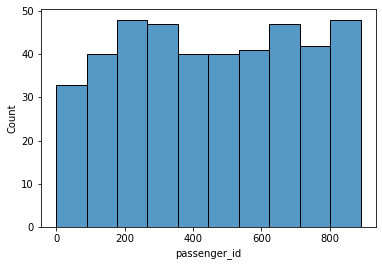

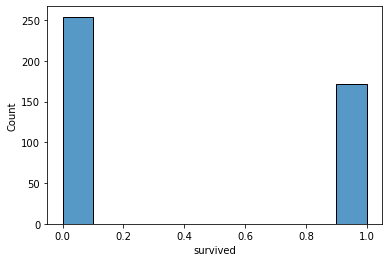

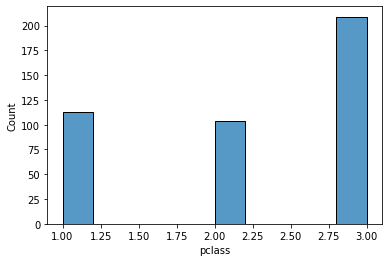

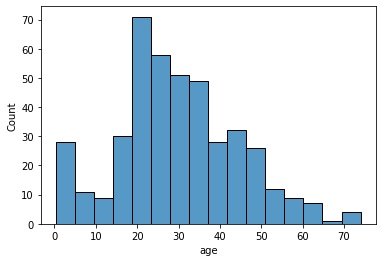

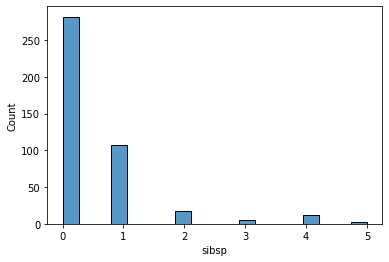

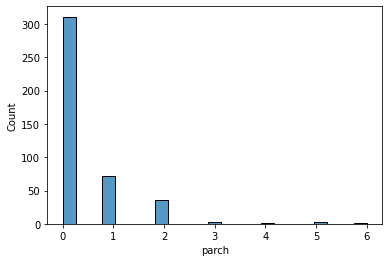

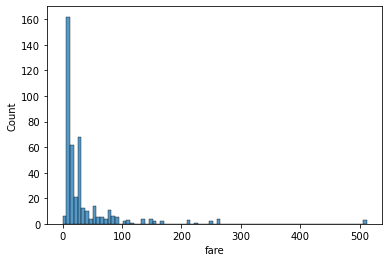

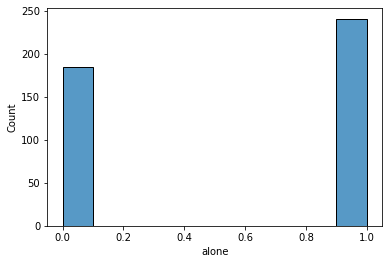

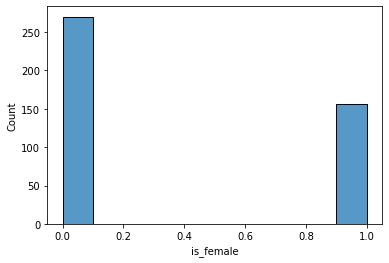

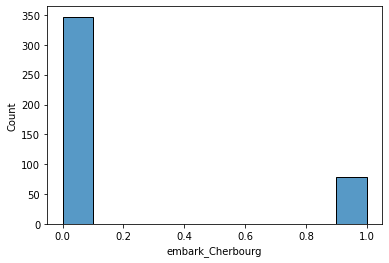

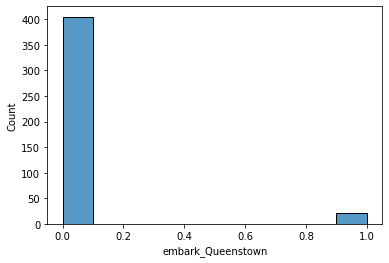

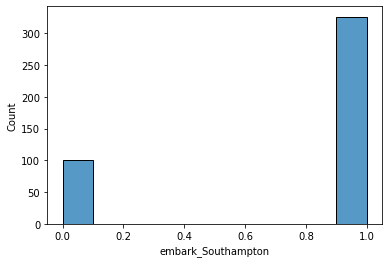

In [7]:
for col in num_columns:
    sns.histplot(data=train_titanic, x=col)
    plt.show()
# most passengers in 3rd class
# most passengers survived
# age has normal curve 
# fare has some big outliers --> think about removing them 
# more came alone than did not

In [8]:
train_titanic.describe()
# don't really notice anything different from the graphs

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,457.565728,0.403756,2.225352,29.937019,0.507042,0.410798,36.360788,0.565728,0.366197,0.185446,0.049296,0.765258
std,255.266471,0.491227,0.840681,14.545797,0.915846,0.824779,59.928092,0.496244,0.482331,0.389116,0.216739,0.424336
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,239.000000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,451.000000,0.000000,2.000000,29.000000,0.000000,0.000000,15.645850,1.000000,0.000000,0.000000,0.000000,1.000000
75%,681.750000,1.000000,3.000000,39.000000,1.000000,1.000000,32.087475,1.000000,1.000000,0.000000,0.000000,1.000000
max,890.000000,1.000000,3.000000,74.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


### Bivariate

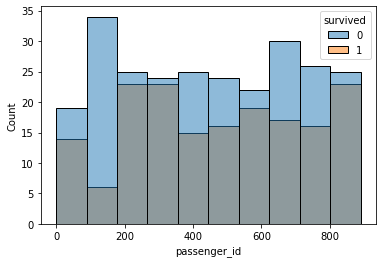

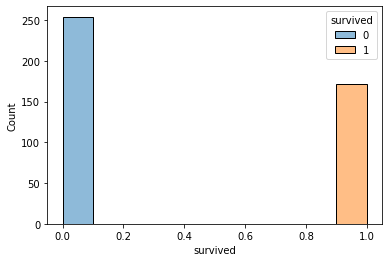

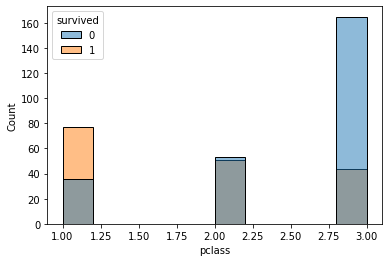

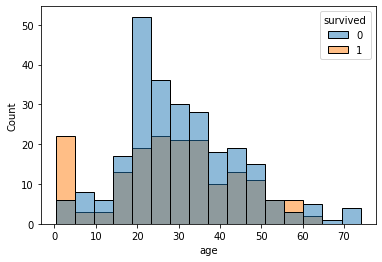

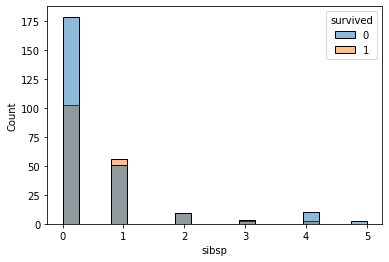

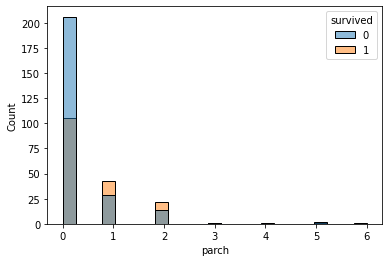

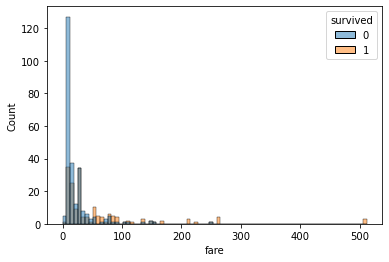

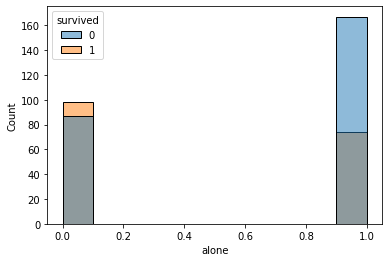

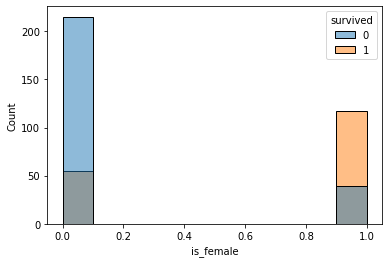

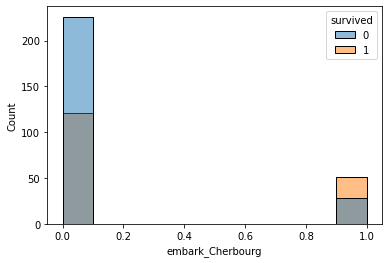

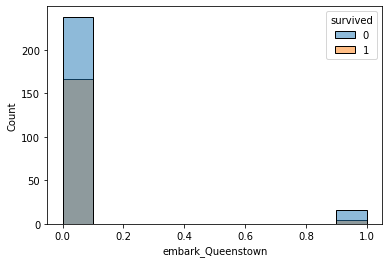

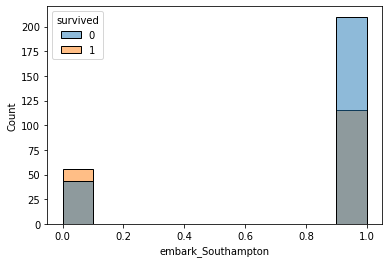

In [ ]:
for col in num_columns:
    sns.histplot(data=train_titanic, x=col, hue='survived')
    plt.show()
# shows large imbalances in fare/pclass, sibsp/parch/alone, is_female
# shows small bumps/imbalances in age groups 
# cherbourg and southampton show a large difference
# can probably drop passenger_id columns

### Questions 
Compare `survived` to `[pclass, sibsp, parch, alone, embarked, is_female, fare]`

* add takeaways/answers as plot titles

In [10]:
# prep population mean for visual comparision
survive_rate = train_titanic.survived.mean()

* `plcass` to `survived` --> Relationship between survival and ticket class?

Text(0.5, 1.0, '1st and 2nd class have higher than average survival rate')

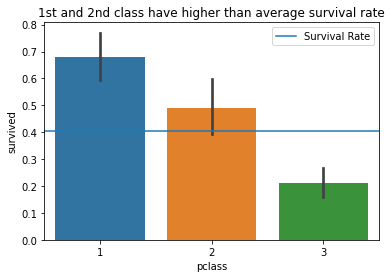

In [11]:
sns.barplot(data=train_titanic, x='pclass', y='survived')
plt.axhline(survive_rate, label='Survival Rate')
plt.legend()
plt.title('1st and 2nd class have higher than average survival rate')

* `sibsp` to `survived` --> Relationship between survival and being accompnied?

Text(0.5, 1.0, 'People with 1-3 family more likely to survive')

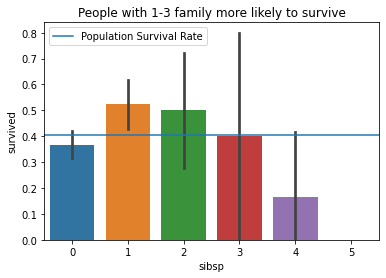

In [12]:
sns.barplot(data=train_titanic, x='sibsp', y='survived')
plt.axhline(survive_rate, label='Population Survival Rate')
plt.legend()
plt.title('People with 1-3 family more likely to survive')

* `parch` to `survived` -->  Relationship between survival and having parent/child aboard?

Text(0.5, 1.0, '1st and 2nd class have higher than average survival rate')

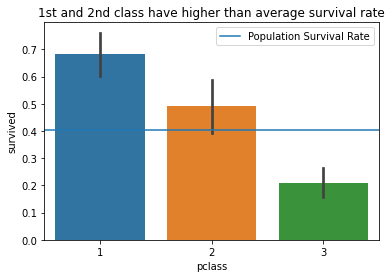

In [13]:
sns.barplot(data=train_titanic, x='pclass', y='survived')
plt.axhline(survive_rate, label='Population Survival Rate')
plt.legend()
plt.title('1st and 2nd class have higher than average survival rate')

* `alone` to `survived`-->  Relationship between survival and being unaccompanied?

Text(0.5, 1.0, 'People traveling alone much less likely to survive')

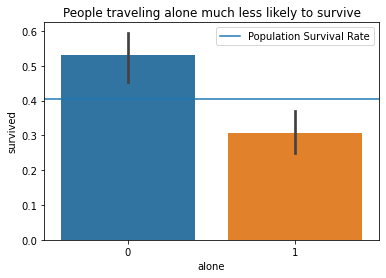

In [14]:
sns.barplot(data=train_titanic, x='alone', y='survived')
plt.axhline(survive_rate, label='Population Survival Rate')
plt.legend()
plt.title('People traveling alone much less likely to survive')

* `embarked` to `survived`-->  Relationship between survival and where you joined from?

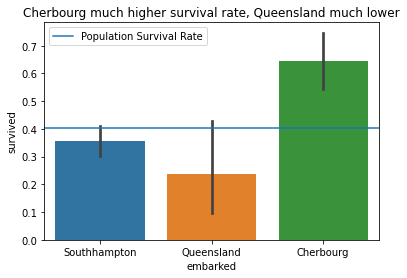

In [15]:
# viz_embarked = sns.FacetGrid(data=train_titanic, col='survived')
sns.barplot(data=train_titanic, x='embarked', y='survived' )
plt.axhline(survive_rate, label='Population Survival Rate')
plt.legend()
plt.title('Cherbourg much higher survival rate, Queensland much lower')
plt.xticks(ticks=[0, 1, 2], labels=['Southhampton', 'Queensland', 'Cherbourg'])
plt.show()

* `is_female` to `survived`-->  Relationship between survival and gender?

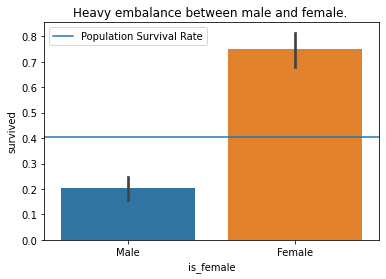

In [16]:
sns.barplot(data=train_titanic, x='is_female', y='survived' )
plt.axhline(survive_rate, label='Population Survival Rate')
plt.legend()
plt.title('Heavy embalance between male and female. ')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

* `is_female` to `survived` --> chi^2 test
    * ${H_0}$ : No relationship between survival and gender
    * ${H_a}$ : There is relationship between survival and gender
    * alpha = .05

In [17]:
#crosstab --> feed into chi^2
observed = pd.crosstab(train_titanic['survived'], train_titanic['is_female'])
alpha = .05

chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'chi^2 is: {chi2}')
print(f'p-value is: {p}')

if p < alpha:
    print('Reject null hypothesis that is no relationship between survival and gender ')
else:
    print('Fail to reject hypothesis')

chi^2 is: 120.31353064738778
p-value is: 5.401246618666467e-28
Reject null hypothesis that is no relationship between survival and gender 


* `fare` to `survived`-->  Relationship between survival and fare?
    * Look at graph split into survived/non
    * Look at graph vs survival rates with fares binned --> revisit
    * compare fare means with of survived vs deceased

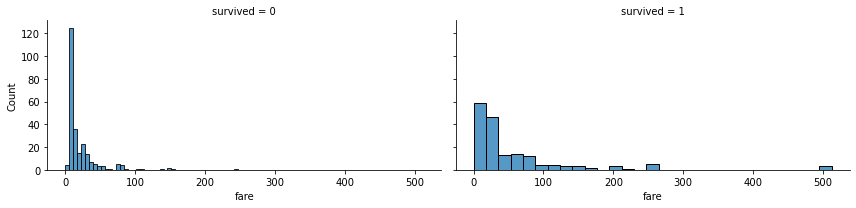

In [18]:

viz_fare=sns.FacetGrid(data=train_titanic, col='survived', aspect=2)
viz_fare.map_dataframe(sns.histplot, x='fare')
plt.show()

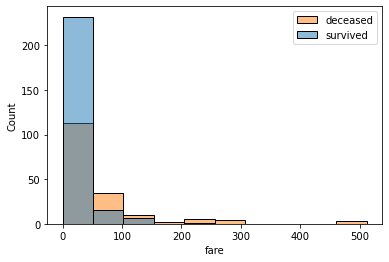

In [19]:
sns.histplot(data=train_titanic, x='fare', hue='survived', bins=10)
plt
plt.legend(labels=['deceased', 'survived'])
plt.show()

* `fare` to `survived` --> Did people that survive pay higher fares?
    * ${H_0}$ : Survivors paid less than or equal to those that are deceased
    * ${H_a}$ : Surivvors paid more than those that are deceased
    * alpha = .05

In [20]:
#make subsets
survived = train_titanic[train_titanic['survived'] == 1]
deceased = train_titanic[train_titanic['survived'] == 0]

#compare means and
print(f'Survived: mean = {survived.fare.mean()}, var = {survived.fare.var()}')
print(f'Deceased: mean = {deceased.fare.mean()}, var = {deceased.fare.var()}')

Survived: mean = 57.66509418604651, var = 6974.064636971423
Deceased: mean = 21.934250393700808, var = 801.7385901670954


In [21]:
#feed in Mann-Whitney. single tail (<) 
alpha = .05

t, p = stats.mannwhitneyu(survived.fare, deceased.fare, alternative='greater')

print(f't-statistic is: {t}')
print(f'p-value is: {p}')

if p < alpha:
    print('Reject null hypothesis that Survivors paid less than or equal to those that are deceased')
else:
    print('Fail to reject hypothesis')

t-statistic is: 31614.0
p-value is: 2.3002881711743158e-15
Reject null hypothesis that Survivors paid less than or equal to those that are deceased


#### Takeaways (Up till now):
* shows large survivability imbalances in fare/pclass, sibsp/parch/alone, is_female
* shows small bumps/imbalances in age groups 
* cherbourg and southampton show a large difference
* can probably drop passenger_id columns
* 1st and 2nd class have higher than average survival rate
* People traveling alone much less likely to survive
* Cherbourg much higher survival rate, Queensland much lower
* Heavy embalance between male and female. 

### Multivariate

#### Questions:
*  `survived` vs `gender` and `pclass`
*  `survived` vs `gender` and `age`
*  `survived` vs `embarked` and `pclass`
*  `survived` vs `alone` and `pclass`
*  `survived` vs `age` and `pclass`

*  `survived` vs `gender` and `pclass` - Does gender imablance in survivability hold between classes?

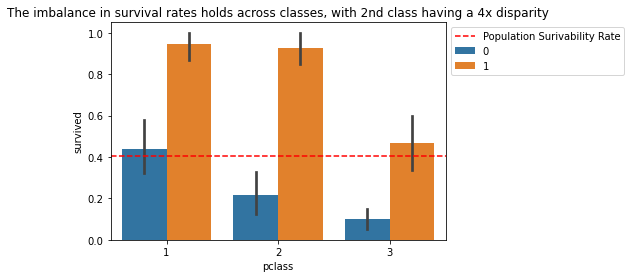

In [49]:
sns.barplot(data=train_titanic, y='survived', x='pclass', hue='is_female')
plt.axhline(train_titanic.survived.mean(), color='red', linestyle='dashed', label='Population Surivability Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('The imbalance in survival rates holds across classes, with 2nd class having a 4x disparity')
plt.show()

*  `survived` vs `gender` and `age` - Does gender imbalance in survivability hold across ages?

In [139]:
age_bins = [0,20,40,60,80]
train_titanic['age_group']=pd.cut(train_titanic['age'],age_bins, include_lowest=True)


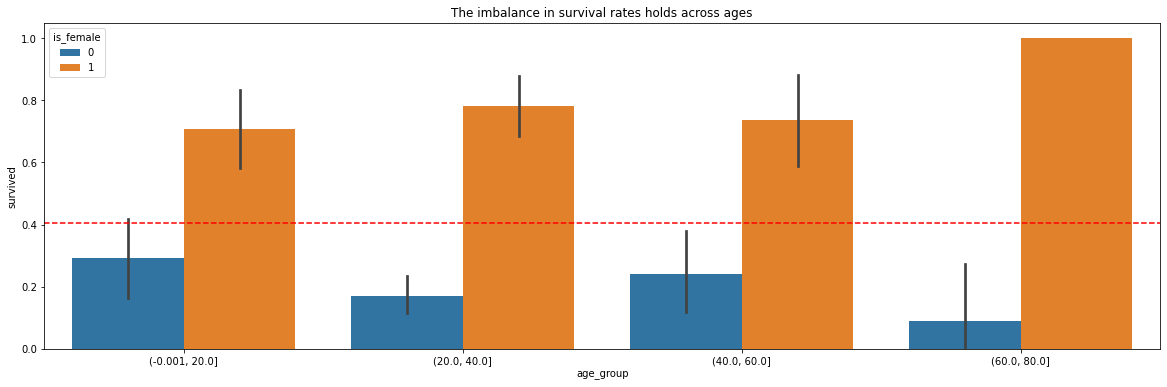

In [140]:
sns.barplot(data=train_titanic, y='survived', x='age_group', hue='is_female')
plt.axhline(train_titanic.survived.mean(), color='red', linestyle='dashed', label='Population Surivability Rate')
plt.title('The imbalance in survival rates holds across ages, greatest disparity in 20~40 and 60~80 age groups')
plt.gcf().set_size_inches(20,6)
plt.show()

*  `survived` vs `embarked` and `pclass` - Does place of embarkation affect survivabilty equally across classes?

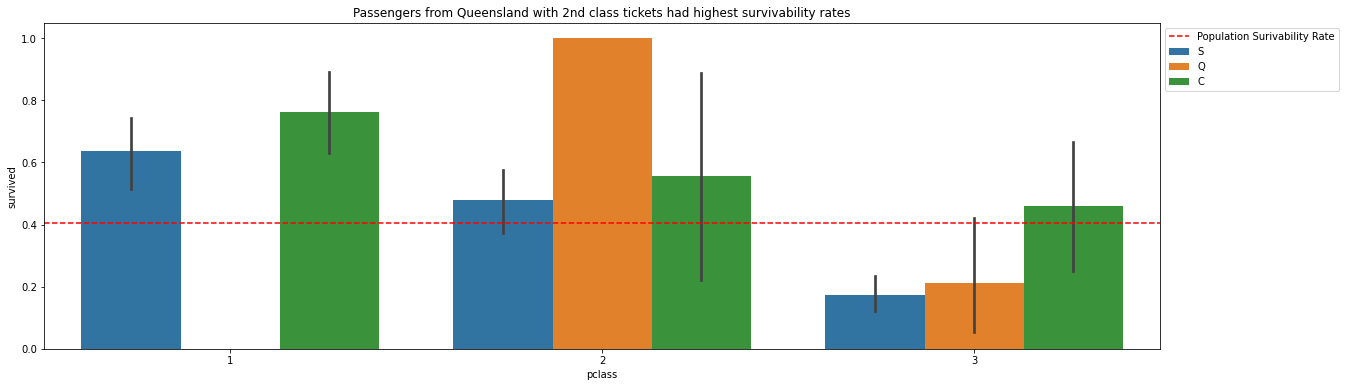

In [144]:
sns.barplot(data=train_titanic, x='pclass', y='survived', hue='embarked')
plt.axhline(train_titanic.survived.mean(), color='red', linestyle='dashed', label='Population Surivability Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Passengers from Queensland with 2nd class tickets had highest survivability rates')
plt.gcf().set_size_inches(20,6)
plt.show()

*  `survived` vs `alone` and `pclass` - Does being alone affect survivability equally across classes?

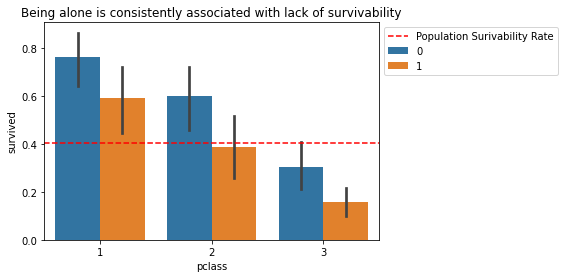

<Figure size 1728x432 with 0 Axes>

In [148]:
sns.barplot(data=train_titanic, x='pclass', y='survived', hue='alone')
plt.axhline(train_titanic.survived.mean(), color='red', linestyle='dashed', label='Population Surivability Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Being alone is consistently associated with lack of survivability')
plt.show()

*  `survived` vs `age` and `pclass` - Does age affect survivabilty at similar rates across classes?

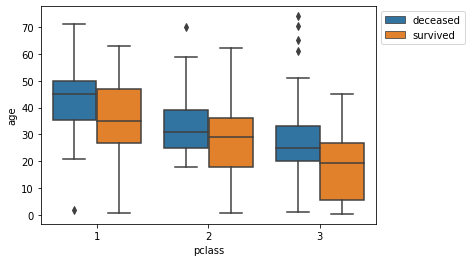

In [186]:
g = sns.boxplot(data=train_titanic, x='pclass', y='age', hue='survived')
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles, labels=['deceased','survived'], loc='upper left', bbox_to_anchor=(1,1))
plt.title('In each class the surviviors trended slightly younger')
#plt.title('')
#plt.figure(figsize=(24,6))
plt.show()

* Determine if certain columns should be dropped
    * can drop `passenger_id` and `alone`

* Determine if it would be valuable to bin some numeric columns
    * can bin `age` into children/adults/seniors or other demographic sections

* Determine if it would be valuable to combine multiple columns into one.
    * combine sibsp and parch into family

In [187]:
train_titanic['family'] = train_titanic['sibsp'] + train_titanic['parch']

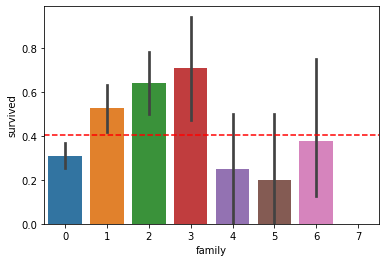

In [190]:
sns.barplot(data=train_titanic, x='family', y='survived')
plt.axhline(train_titanic.survived.mean(), color='red', linestyle='dashed', label='Population Surivability Rate')
plt.title('Having between 1 and 3 family members aboard increased odds of surviving')
plt.show()

In [12]:
sns.barplot(data=train_titanic, x='family', y='survived', hue='is_female')
plt.axhline(train_titanic.survived.mean(), color='red', linestyle='dashed', label='Population Surivability Rate')
plt.title('Families with 5 or more members do not appear to have any male survivors')
plt.show()

NameError: name 'train_titanic' is not defined

In [204]:
train_titanic[(train_titanic.is_female == 0) & (train_titanic.survived == 1) & (train_titanic.family <= 3)].count()

passenger_id          55
survived              55
pclass                55
age                   55
sibsp                 55
parch                 55
fare                  55
embarked              55
alone                 55
is_female             55
embark_Cherbourg      55
embark_Queenstown     55
embark_Southampton    55
age_group             55
family                55
dtype: int64

* Does it make sense to combine any features?
    * none that I can see. not really sure how to decide at any rate. 

* Do you find any surprises?
    * No

* Document any and all findings and takeaways in your notebook using markdown.
    * shows large survivability imbalances in fare/pclass, sibsp/parch/alone, is_female
    * shows small bumps/imbalances in age groups 
    * cherbourg and southampton show a large difference
    * can probably drop passenger_id columns
    * 1st and 2nd class have higher than average survival rate
    * People traveling alone much less likely to survive
    * Cherbourg much higher survival rate, Queensland much lower
    * Heavy embalance between male and female.
    * can bin `age` into children/adults/seniors or other demographic sections
    * combine sibsp and parch into family
    * Having between 1 and 3 family members aboard increased odds of surviving
    * can drop `passenger_id` and `alone`

## Part III: `telco`
Explore your telco data to discover drivers of churn

### Acquire + Prep

In [3]:
df_teclo = acquire.get_telco_data()

In [4]:
df_telco = prepare.prep_telco(df_teclo)

In [5]:
train_telco, validate_telco, test_telco = prepare.split_data(df_telco, 'churn')

Prepared df: (7043, 48)

Train: (4225, 48)
Validate: (1409, 48)
Test: (1409, 48)


In [6]:
train_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender                                 4225 non-null   object 
 2   senior_citizen                         4225 non-null   int64  
 3   partner                                4225 non-null   object 
 4   dependents                             4225 non-null   object 
 5   tenure                                 4225 non-null   int64  
 6   phone_service                          4225 non-null   object 
 7   multiple_lines                         4225 non-null   object 
 8   online_security                        4225 non-null   object 
 9   online_backup                          4225 non-null   object 
 10  device_protection                      4225 non-null   object 
 11  t

### Explore

#### Univariate

In [7]:
telco_numcol = train_telco.columns[0:21]

In [8]:
telco_numcol

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'payment_type',
       'internet_service_type'],
      dtype='object')

In [9]:
title_dict = dict.fromkeys(telco_numcol)

In [10]:
title_dict = {'customer_id': 'Nothing pertinent observed',
 'gender': 'Roughly equal gender representation',
 'senior_citizen': 'Underrepresented compared to U.S. population totals',
 'partner': 'Roughly equal representation between single and partnered customers',
 'dependents': 'Most customers without sependents',
 'tenure': 'Tenure is bookended by large numbers at the extremes',
 'phone_service': 'Most customers have phone service',
 'multiple_lines': 'Those with phone service are slightly more likely to NOT have multiple lines',
 'online_security': 'Most do not have online security',
 'online_backup': 'Most do not have online backup',
 'device_protection': 'Most do not have device protection',
 'tech_support': 'Most do not have tech support',
 'streaming_tv': 'Customers with internet are evenly split on streaming_tv',
 'streaming_movies': 'Customers with internet are evenly split on streaming_movies',
 'paperless_billing': 'Most customers opt for paperless billing',
 'monthly_charges': 'Large majority of customers pay above $60',
 'total_charges': 'Nothing interesting as total_charges likely to correlate with tenure',
 'churn': 'More have not churned than have',
 'contract_type': 'Month-to_month is the preferred contract type',
 'payment_type': 'Electronic Check most prefered payment type',
 'internet_service_type': 'Fiber Optic most popular internet service type'}

In [11]:
for col in telco_numcol:
    print(title_dict[col])

Nothing pertinent observed
Roughly equal gender representation
Underrepresented compared to U.S. population totals
Roughly equal representation between single and partnered customers
Most customers without sependents
Tenure is bookended by large numbers at the extremes
Most customers have phone service
Those with phone service are slightly more likely to NOT have multiple lines
Most do not have online security
Most do not have online backup
Most do not have device protection
Most do not have tech support
Customers with internet are evenly split on streaming_tv
Customers with internet are evenly split on streaming_movies
Most customers opt for paperless billing
Large majority of customers pay above $60
Nothing interesting as total_charges likely to correlate with tenure
More have not churned than have
Month-to_month is the preferred contract type
Electronic Check most prefered payment type
Fiber Optic most popular internet service type


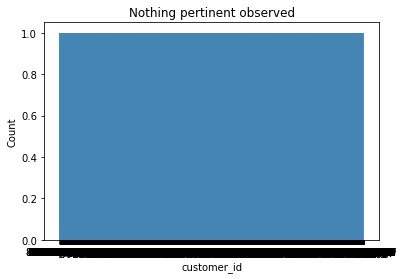

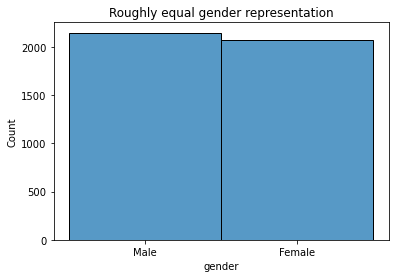

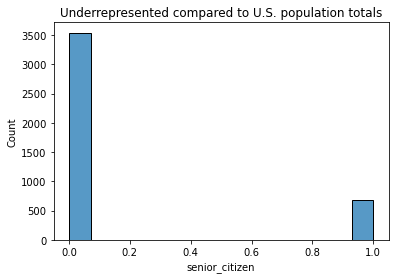

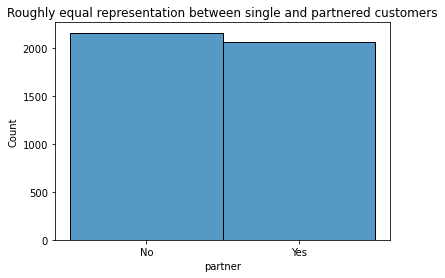

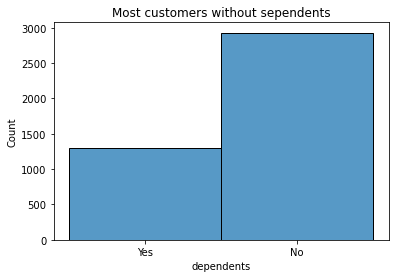

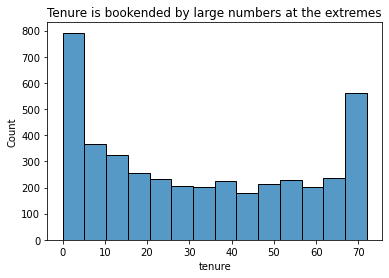

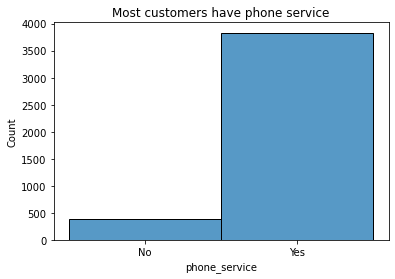

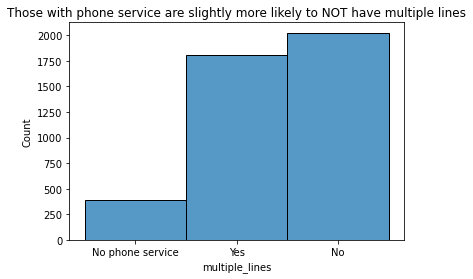

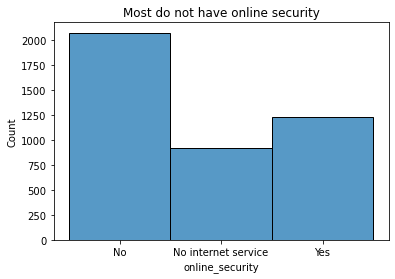

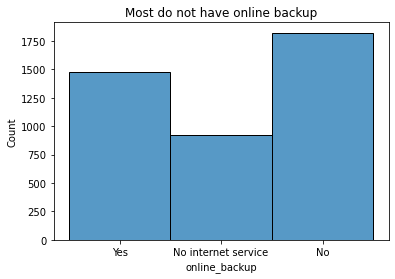

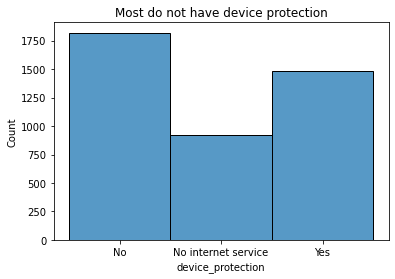

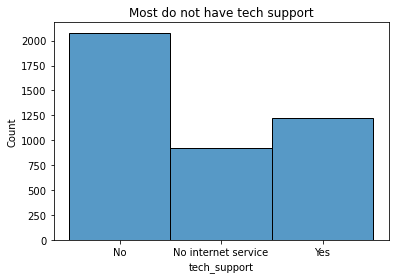

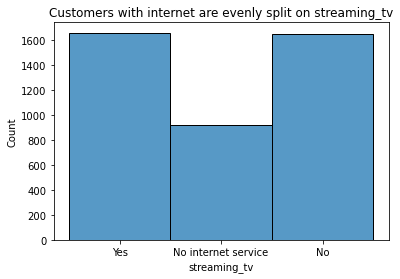

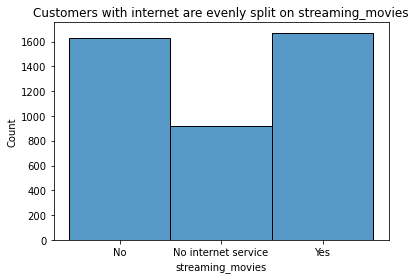

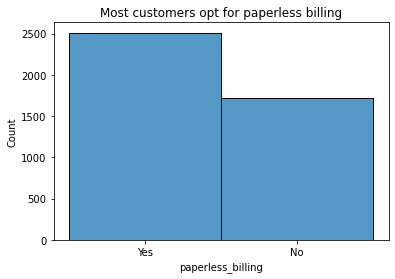

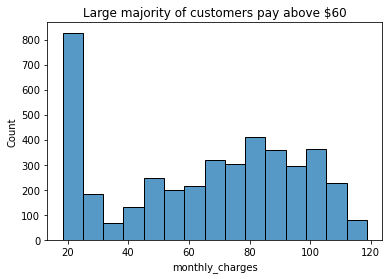

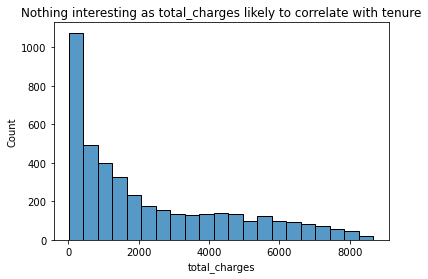

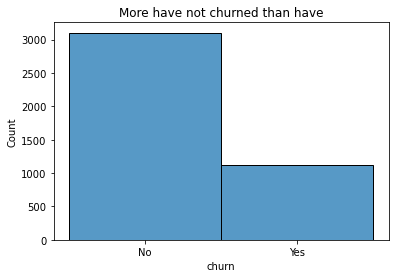

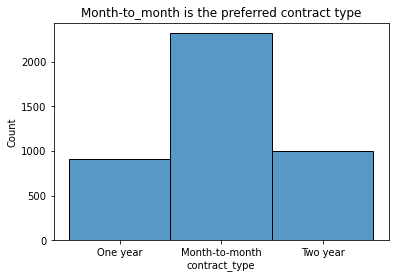

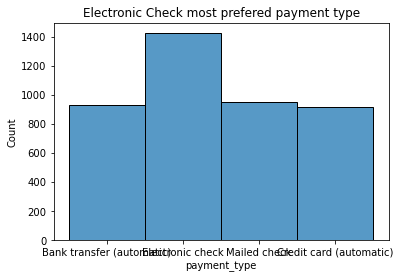

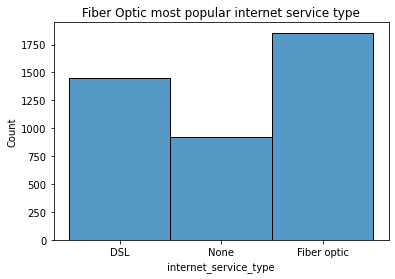

In [26]:
for col in telco_numcol:
    plt.title(title_dict[col])
    sns.histplot(data=train_telco, x=col)
    plt.show()
 

In [13]:
train_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,0,1,0,0,0,0,0,1,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,1,0,1,0,1,0,1,0,1,0
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,0,0,0,1,0,0,0,0,0,0
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,0,1,0,0,0,1,0,1,0,1
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,1


In [14]:
train_telco.describe()
# senior citizens 16% of data
# avg tenure = 32
# most montly charges are above mean
# streaming movies/tv extremely similar rates

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
count,4225.000000,4225.000000,4225.000000,4216.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.161893,32.500828,65.056142,2303.420292,0.491361,0.488521,0.306272,0.906982,0.593846,0.265325,...,0.218462,0.350059,0.218462,0.351006,0.218462,0.289467,0.218462,0.392189,0.218462,0.395503
std,0.368397,24.532563,30.268493,2271.540183,0.499985,0.499927,0.460999,0.290492,0.491172,0.441559,...,0.413251,0.477045,0.413251,0.477341,0.413251,0.453569,0.413251,0.488296,0.413251,0.489016
min,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.650000,413.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.400000,1406.325000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.150000,3871.775000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#percentage of customers that pay more than $60
(train_telco['monthly_charges'] > 60).mean()

0.5910059171597634

#### Takeaways
* 'Roughly equal gender representation' --> 49.1
* 'Roughly equal representation between single and partnered customers' --> 48
*  'Most customers without dependents' --> 30% without
* 'Tenure is bookended by large numbers at the extremes'
*  'Most customers have phone service' --> 90
* 'Those with phone service are slightly more likely to NOT have multiple lines'
*  'Most do not have online security'
*  'Most elgible do not have online backup' --> 35%
* 'Most do not have device protection' --> 35%
* 'Most do not have tech support' --> 28%
* 'Customers with internet are evenly split on streaming_tv' --> 39%
*  'Customers with internet are evenly split on streaming_movies' --> 39%
* 'Most customers opt for paperless billing' --> 59%
* ' ~~Large~~ majority of customers pay above $60' --> 60%
* 'Nothing interesting as total_charges likely to correlate with tenure'
* 'More have not churned than have' --> target variable
* 'Month-to_month is the preferred contract type'
* 'Electronic Check most prefered payment type'
* 'Fiber Optic most popular internet service type'

In [34]:
title_bivariate = {'customer_id': 'Nothing pertinent observed',
 'gender': 'Roughly equal gender representation in churn vs no_churn',
 'senior_citizen': 'Underrepresented compared to U.S. population totals',
 'partner': 'Roughly equal representation between single and partnered customers',
 'dependents': 'Most customers without sependents',
 'tenure': 'Tenure is bookended by large numbers at the extremes',
 'phone_service': 'Most customers have phone service',
 'multiple_lines': 'Those with phone service are slightly more likely to NOT have multiple lines',
 'online_security': 'Most do not have online security',
 'online_backup': 'Most do not have online backup',
 'device_protection': 'Most do not have device protection',
 'tech_support': 'Most do not have tech support',
 'streaming_tv': 'Customers with internet are evenly split on streaming_tv',
 'streaming_movies': 'Customers with internet are evenly split on streaming_movies',
 'paperless_billing': 'Most customers opt for paperless billing',
 'monthly_charges': 'Large majority of customers pay above $60',
 'total_charges': 'Nothing interesting as total_charges likely to correlate with tenure',
 'churn': 'More have not churned than have',
 'contract_type': 'Month-to_month is the preferred contract type',
 'payment_type': 'Electronic Check most prefered payment type',
 'internet_service_type': 'Fiber Optic most popular internet service type'}

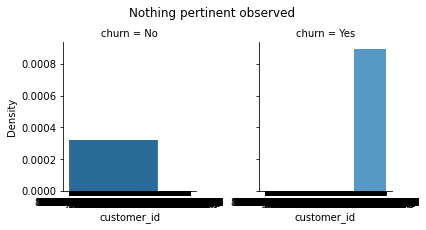

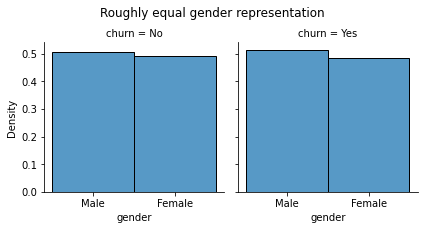

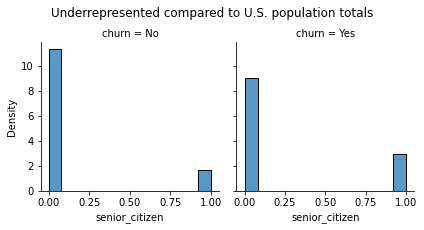

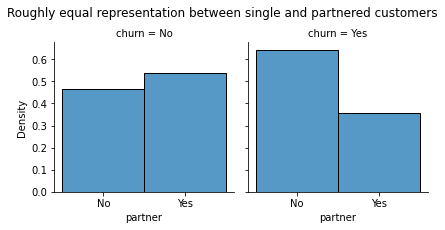

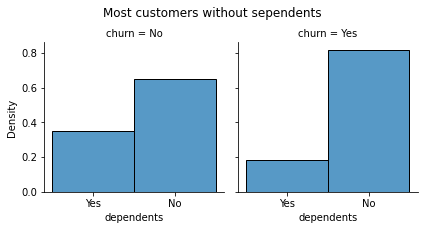

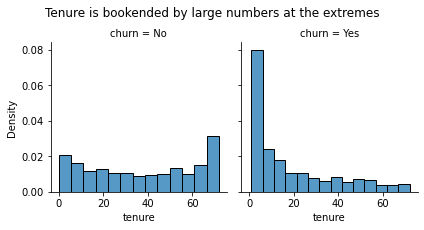

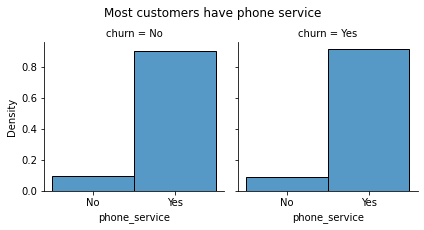

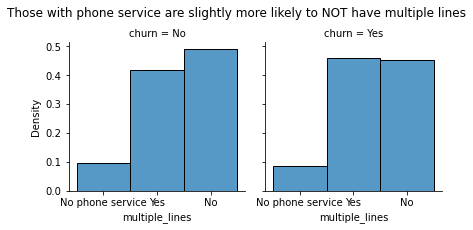

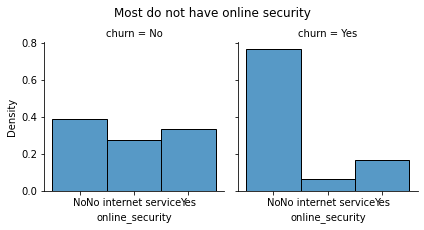

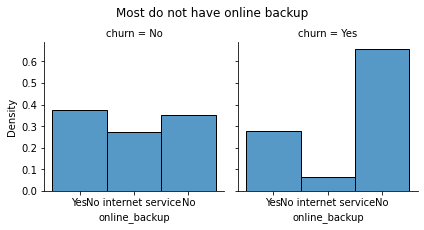

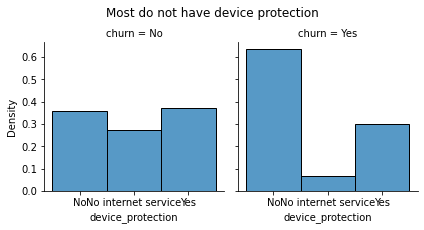

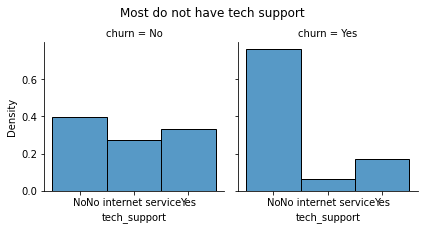

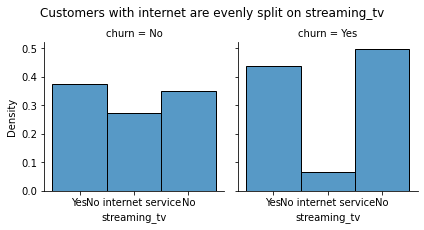

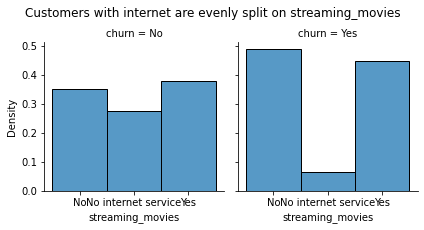

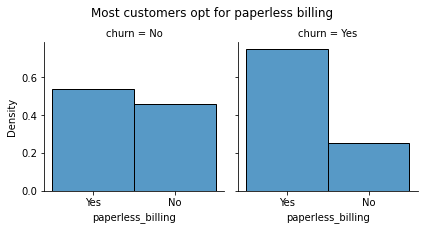

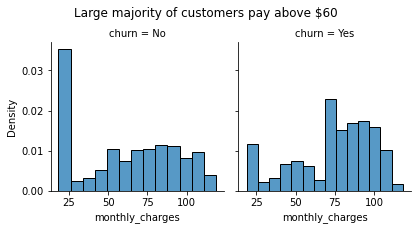

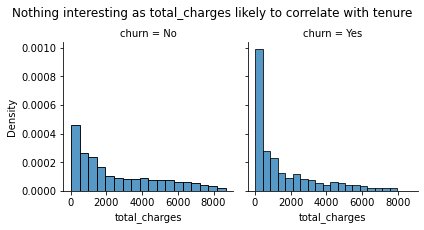

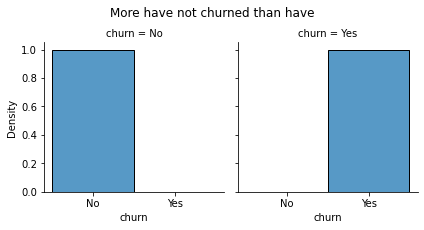

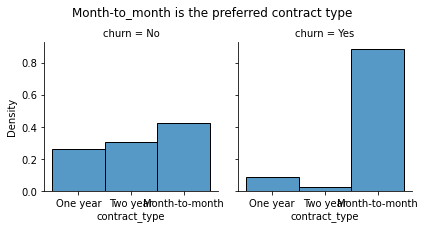

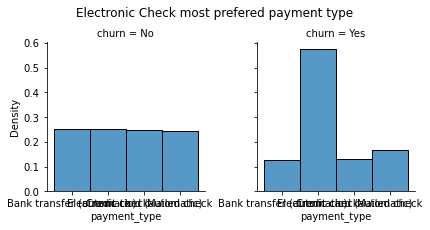

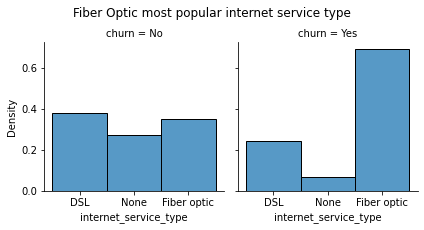

In [40]:
for col in telco_numcol:
    viz_telco = sns.FacetGrid(data=train_telco, col='churn')
    viz_telco.map_dataframe(sns.histplot, x=col, stat="density")
    viz_telco.fig.suptitle(title_bivariate[col], y=1.05)

#### Multivariate

#### Statistical Tests (if needed to add clarity)

* Determine if certain columns should be dropped

* Determine if it would be valuable to bin some numeric columns

* Determine if it would be valuable to combine multiple columns into one.

* What are your drivers of churn?

* Does it make sense to combine any features?

* Do you find any surprises?

* Document any and all findings and takeaways in your notebook using markdown.

In [16]:
:

SyntaxError: invalid syntax (1305497275.py, line 1)